# OPTICS Algorithm 

In [1]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
# Install hdbscan using anaconda command prompt
# conda install -c conda-forge hdbscan

# OPTICS Clustering Algorithm

Finds core samples of high density and expands clusters from them. This example uses data that is generated so that the clusters have different densities. The class, cluster.OPTICS is first used with its Xi cluster detection method, and then setting specific thresholds on the reachability, which corresponds to :class:~cluster.DBSCAN. We can see that the different clusters of OPTICS's Xi method can be recovered with different choices of thresholds in DBSCAN.

In [5]:
# import the following libraries
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
np.random.seed(0)
n_points_per_cluster = 250

# Generate the arrays based on random numbers

C1 = [-5, -2] + .8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + .1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + .2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + .3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)

# Combine all arrays into an X array
X = np.vstack((C1, C2, C3, C4, C5, C6))

# Initialise clust object by calling OPTICS()
clust = OPTICS(min_samples = 50, xi = 0.05, min_cluster_size = 0.05)

# Run the fit method to train the data
clust.fit(X)
#print(clust.reachability_, clust.core_distances_clust.ordering_)

OPTICS(min_cluster_size=0.05, min_samples=50)

In [6]:
# Set eps = 0.5
labels_050 = cluster_optics_dbscan(reachability = clust.reachability_,
                                   core_distances = clust.core_distances_,
                                   ordering = clust.ordering_, eps = 0.5)

# Set eps = 2
labels_200 = cluster_optics_dbscan(reachability = clust.reachability_,
                                   core_distances = clust.core_distances_,
                                   ordering = clust.ordering_, eps = 2)

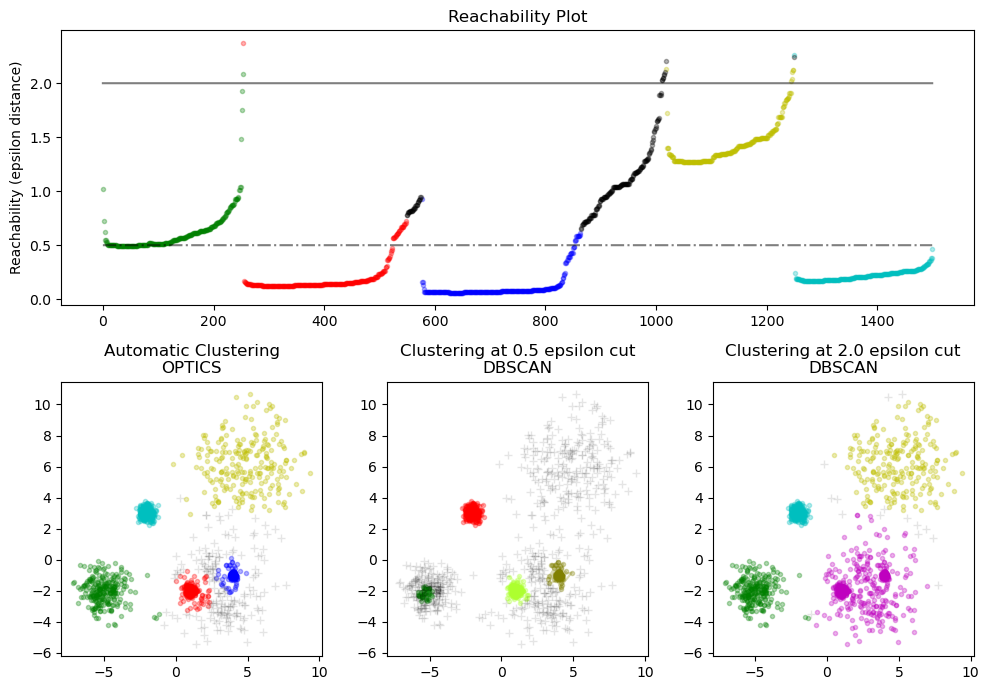

In [7]:
# Declare an object named as 'space'
space = np.arange(len(X))

# Set the reachability distance 
reachability = clust.reachability_[clust.ordering_]

# Store the labels
labels = clust.labels_[clust.ordering_]

# Size of the figure and Grid
plt.figure(figsize = (10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ['g.', 'r.', 'b.', 'y.', 'c.']

# Use for loop for klass and color
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

# OPTICS
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha = 0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], 'k+', alpha = 0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN at 0.5
colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
for klass, color in zip(range(0, 6), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha = 0.3, marker = '.')
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], 'k+', alpha = 0.1)
ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

# DBSCAN at 2.
colors = ['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha = 0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], 'k+', alpha = 0.1)
ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

plt.tight_layout()
plt.show()

## Task 1
Assume you own a grocery mall and have access to basic information on your customers via membership cards, such as Customer ID, age, gender, annual income, and spending score. Based on your specified criteria, such as customer behavior and purchasing information, you can assign the customer a spending score. In order to reward or promote your consumers, you as the owner would like to understand their behavior. So that your marketing team plan the strategy accordingly.

### How to use Machine Learning (OPTICS clustering) algorithm to help the owner of the grocery mall using Annual Income (in thousand dollars) and spending score (1 - 100)?

## Step 1: Importing the required libraries
The dataset used for the demonstration is the Mall Customer Segmentation Data which can be downloaded from Kaggle or Moodle.

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import gridspec 
from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.preprocessing import normalize, StandardScaler 

## Step 2: Loading the Data

In [9]:
# Changing the working location to the location of the data 
  
X = pd.read_csv('Mall_Customers.csv') 
  
# Dropping irrelevant columns 
drop_features = ['CustomerID', 'Gender'] 
X = X.drop(drop_features, axis = 1) 
  
# Handling the missing values if any 
X.fillna(method ='ffill', inplace = True) 
  
X.head() 

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Step 3: Preprocessing the Data

In [11]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that the data 
# approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
  
# Renaming the columns 
X_normalized.columns = X.columns 
  
X_normalized.head() 

,Age,Annual Income (k$),Spending Score (1-100)
0,-0.622173,-0.759499,-0.189897
1,-0.518894,-0.704396,0.484330
2,-0.488556,-0.614244,-0.619691
3,-0.495541,-0.740949,0.453247
4,-0.313049,-0.923896,-0.220036


In [12]:
x = X_normalized.iloc[:, [1,2]].values

## Step 4: Building the Clustering Model

In [13]:
# Initialise clust object by calling OPTICS()
clust = OPTICS(min_samples = 40, xi = 0.05, min_cluster_size = 0.05)

# Run the fit method to train the data
clust.fit(x)
#print(clust.reachability_, clust.core_distances_clust.ordering_)

OPTICS(min_cluster_size=0.05, min_samples=40)

In [8]:
# Building the OPTICS Clustering model 
# Write the code for building the model
  
# Training the model 
# Write the code for training the model

## Step 5: Storing the results of the training

In [14]:
# Producing the labels according to the DBSCAN technique with eps = 0.5 
labels_050 = cluster_optics_dbscan(reachability = clust.reachability_,
                                   core_distances = clust.core_distances_,
                                   ordering = clust.ordering_, eps = 0.5)

# Producing the labels according to the DBSCAN technique with eps = 2.0 
labels_200 = cluster_optics_dbscan(reachability = clust.reachability_,
                                   core_distances = clust.core_distances_,
                                   ordering = clust.ordering_, eps = 2)


# Creating a numpy array with numbers at equal spaces till the specified range 
# Declare an object named as 'space'
space = np.arange(len(X))
    
# Storing the reachability distance of each point 
# Set the reachability distance 
reachability = clust.reachability_[clust.ordering_]
    
# Storing the cluster labels of each point 
# Store the labels
labels = clust.labels_[clust.ordering_]
    
print(labels) 

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1]


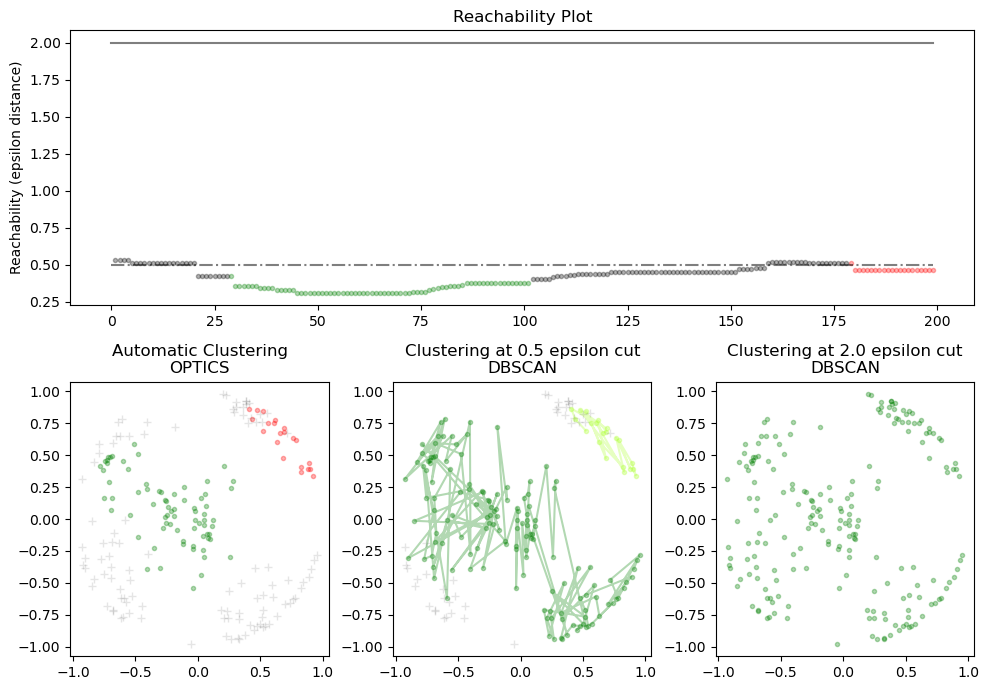

In [18]:
# Size of the figure and Grid
plt.figure(figsize = (10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ['g.', 'r.', 'b.', 'y.', 'c.']

# Use for loop for klass and color
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

# OPTICS
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = x[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha = 0.3)
ax2.plot(x[clust.labels_ == -1, 0], x[clust.labels_ == -1, 1], 'k+', alpha = 0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN at 0.5
colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
for klass, color in zip(range(0, 6), colors):
    Xk = x[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha = 0.3, marker = '.')
ax3.plot(x[labels_050 == -1, 0], x[labels_050 == -1, 1], 'k+', alpha = 0.1)
ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

# DBSCAN at 2.
colors = ['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = x[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha = 0.3)
ax4.plot(x[labels_200 == -1, 0], x[labels_200 == -1, 1], 'k+', alpha = 0.1)
ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

plt.tight_layout()
plt.show()

## Step 6: Visualizing the results

NameError: name 'optics_model' is not defined

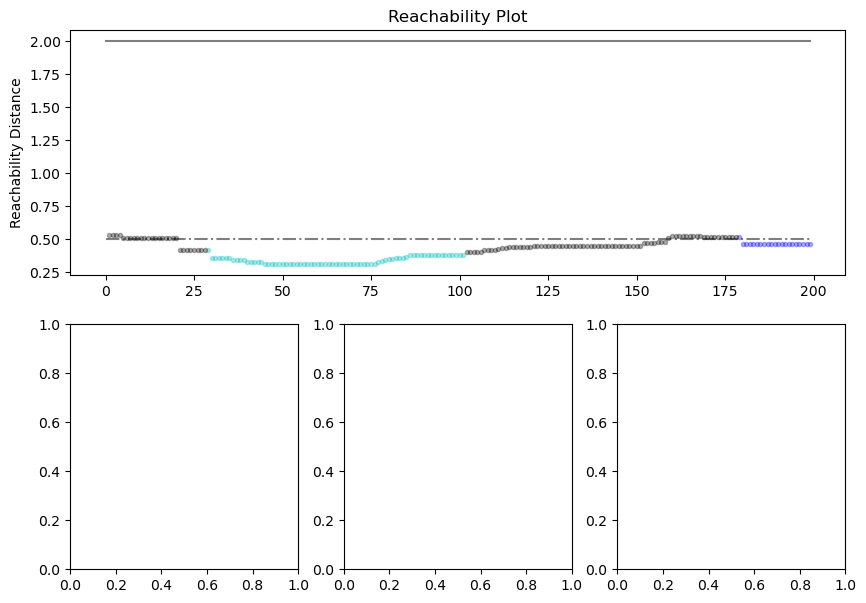

In [16]:
# Defining the framework of the visualization 
plt.figure(figsize = (10, 7)) 
G = gridspec.GridSpec(2, 3) 
ax1 = plt.subplot(G[0, :]) 
ax2 = plt.subplot(G[1, 0]) 
ax3 = plt.subplot(G[1, 1]) 
ax4 = plt.subplot(G[1, 2]) 
  
# Plotting the Reachability-Distance Plot 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 

for Class, colour in zip(range(0, 5), colors): 
    Xk = space[labels == Class] 
    Rk = reachability[labels == Class] 
    ax1.plot(Xk, Rk, colour, alpha = 0.3) 
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3) 
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5) 
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5) 
ax1.set_ylabel('Reachability Distance') 
ax1.set_title('Reachability Plot') 
  
# Plotting the OPTICS Clustering 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = X_normalized[optics_model.labels_ == Class] 
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
      
ax2.plot(X_normalized.iloc[optics_model.labels_ == -1, 0], 
        X_normalized.iloc[optics_model.labels_ == -1, 1], 
       'k+', alpha = 0.1) 
ax2.set_title('OPTICS Clustering') 
  
# Plotting the DBSCAN Clustering with eps = 0.5 
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow'] 
for Class, colour in zip(range(0, 6), colors): 
    Xk = X_normalized[labels1 == Class] 
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.') 
        
ax3.plot(X_normalized.iloc[labels1 == -1, 0], 
        X_normalized.iloc[labels1 == -1, 1], 
       'k+', alpha = 0.1) 
ax3.set_title('DBSCAN clustering with eps = 0.5') 
  
# Plotting the DBSCAN Clustering with eps = 2.0 
colors = ['c.', 'y.', 'm.', 'g.'] 
for Class, colour in zip(range(0, 4), colors): 
    Xk = X_normalized.iloc[labels2 == Class] 
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
          
ax4.plot(X_normalized.iloc[labels2 == -1, 0], 
        X_normalized.iloc[labels2 == -1, 1], 
       'k+', alpha = 0.1) 
ax4.set_title('DBSCAN Clustering with eps = 2.0') 

plt.tight_layout() 
plt.show() 

## Reference:
<p>1. https://scikit-learn.org/stable/auto_examples/cluster/plot_optics.html#sphx-glr-auto-examples-cluster-plot-optics-py</p>
<p>2. https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/</p>
<p>3. https://www.geeksforgeeks.org/ml-optics-clustering-implementing-using-sklearn/?ref=rp</p>